#**Build, Train & Test your Neural Network**

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
# Load the dataset
df = pd.read_csv('train.csv')

# Encode all the categorical features using a LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  label_encoders[col] = le

# Define the features (X) and the target (y)
X = df.drop(columns=['PassengerId', 'Survived', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Embarked'])
y = df['Survived']

# Split the data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = tf.keras.Sequential([
  tf.keras.Input(shape=(4,)),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'precision', 'recall'])

# Train the model
train_history = model.fit(X_train, y_train, epochs=300, batch_size=32)

# Evaluate the model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)

# Print the loss and accuracy
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.2%}')

Epoch 1/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6215 - loss: 0.6665 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6502 - loss: 0.6527 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6374 - loss: 0.6480 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6315 - loss: 0.6425 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6404 - loss: 0.6284 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6016 - loss: 0.6399 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6186 - loss: 0.6238 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 8/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5899 - loss: 0.6459 - pr

#**Plot Metrics**

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
# Print a parameters table
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)

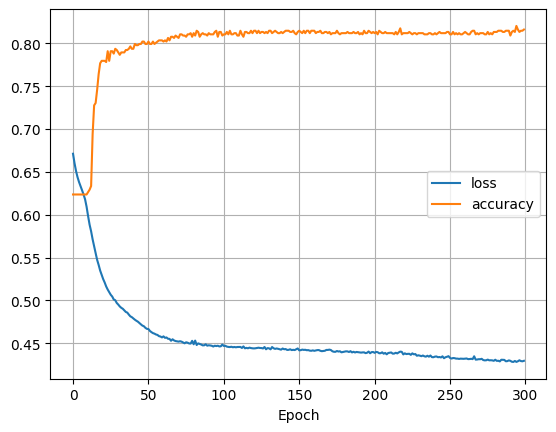

In [5]:
# Plot a loss & accuracy against epoch graph
def plot_graph(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.xlabel('Epoch')
  plt.legend()
  plt.grid(True)
  plt.show

plot_graph(train_history)

In [6]:
# Compute the F1-score of the model
f1 = 2 * (precision * recall) / (precision + recall + 1e-7)

# Print the precision, recall and F1-score of the model
print('{:<25} {:>10} {:>10} {:>10}'.format('Model', 'Precision', 'Recall', 'F1-Score'))
print('-' * 60)
print('{:<25} {:>10.4f} {:>10.4f} {:>10.4f}'.format('Neural Network', precision, recall, f1))

Model                      Precision     Recall   F1-Score
------------------------------------------------------------
Neural Network                0.7910     0.7162     0.7518


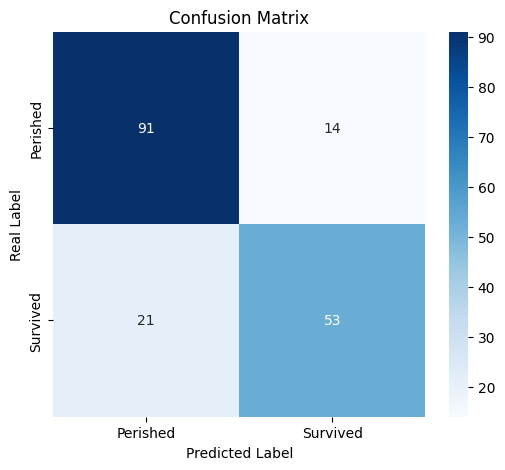

In [7]:
# Make predictions on the test set
y_prob = model.predict(X_test, verbose=0)
y_pred = (y_prob >= 0.5).astype(int).ravel()

# Compute the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Perished', 'Survived'], yticklabels=['Perished', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Real Label')
plt.show()

#**Apply the Model**

In [8]:
# Load dataset for predictions
df_pred = pd.read_csv('test.csv')
X_pred = df_pred.drop(columns=['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Embarked'])

# Encode all the categorical features using a LabelEncoder
label_encoders = {}
for col in X_pred.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_pred[col] = le.fit_transform(X_pred[col])
    label_encoders[col] = le

# Make predictions on the dataset
y_prob = model.predict(X_pred, verbose=0)
y_pred = (y_prob >= 0.5).astype(int).ravel()

# Get the passenger names
passenger_names = df_pred['Name']

# Combine the passenger names and the predictions
predictions = zip(passenger_names, y_pred)

# Print the predictions
print('Predictions:')
for name, pred in predictions:
  name = name.split(',')
  firstname, surname = name[1].lstrip(), name[0]
  status = 'survived' if pred == 1 else 'perished'
  print(f'{firstname} {surname} {status}.')

Predictions:
Mr. James Kelly perished.
Mrs. James (Ellen Needs) Wilkes survived.
Mr. Thomas Francis Myles perished.
Mr. Albert Wirz perished.
Mrs. Alexander (Helga E Lindqvist) Hirvonen survived.
Mr. Johan Cervin Svensson perished.
Miss. Kate Connolly survived.
Mr. Albert Francis Caldwell perished.
Mrs. Joseph (Sophie Halaut Easu) Abrahim survived.
Mr. John Samuel Davies perished.
Mr. Ylio Ilieff perished.
Mr. Charles Cresson Jones perished.
Mrs. John Pillsbury (Nelle Stevenson) Snyder survived.
Mr. Benjamin Howard perished.
Mrs. Herbert Fuller (Carrie Constance Toogood) Chaffee survived.
Mrs. Sebastiano (Argenia Genovesi) del Carlo survived.
Mr. Daniel Keane perished.
Mr. Gerios Assaf perished.
Miss. Ida Livija Ilmakangas survived.
Mrs. Mariana (Miriam")" Assaf Khalil survived.
Mr. Martin Rothschild perished.
Master. Artur Karl Olsen perished.
Mrs. Alfred (Antoinette) Flegenheim survived.
Mr. Richard Norris II Williams perished.
Mrs. Arthur Larned (Emily Maria Borie) Ryerson survived.